## CARGAR EL DATASET

In [13]:
import pandas as pd

# Cargar dataset
df = pd.read_csv("SMUSIC.csv")

# Ver las primeras filas
df.head()

# Revisar valores nulos
print(df.isnull().sum())

# Para 'genres' que tiene 163 nulos, podemos imputar "unknown" o eliminar
df['genres'].fillna('unknown', inplace=True)

# Confirmar que ya no hay nulos
print(df.isnull().sum())

# Eliminar duplicados si los hay (por ejemplo por track_name y artist_name)
df.drop_duplicates(subset=['track_name', 'artist_name'], inplace=True)

print(f"Datos después limpieza: {df.shape}")


Unnamed: 0             0
artist_name            0
genres               163
followers              0
artist_popularity      0
artist_url             0
track_name             0
album_name             0
release_date           0
duration_ms            0
explicit               0
track_popularity       0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
dtype: int64
Unnamed: 0           0
artist_name          0
genres               0
followers            0
artist_popularity    0
artist_url           0
track_name           0
album_name           0
release_date         0
duration_ms          0
explicit             0
track_popularity     0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          

C:\Users\gutie\AppData\Local\Temp\ipykernel_14236\563840607.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].fillna('unknown', inplace=True)


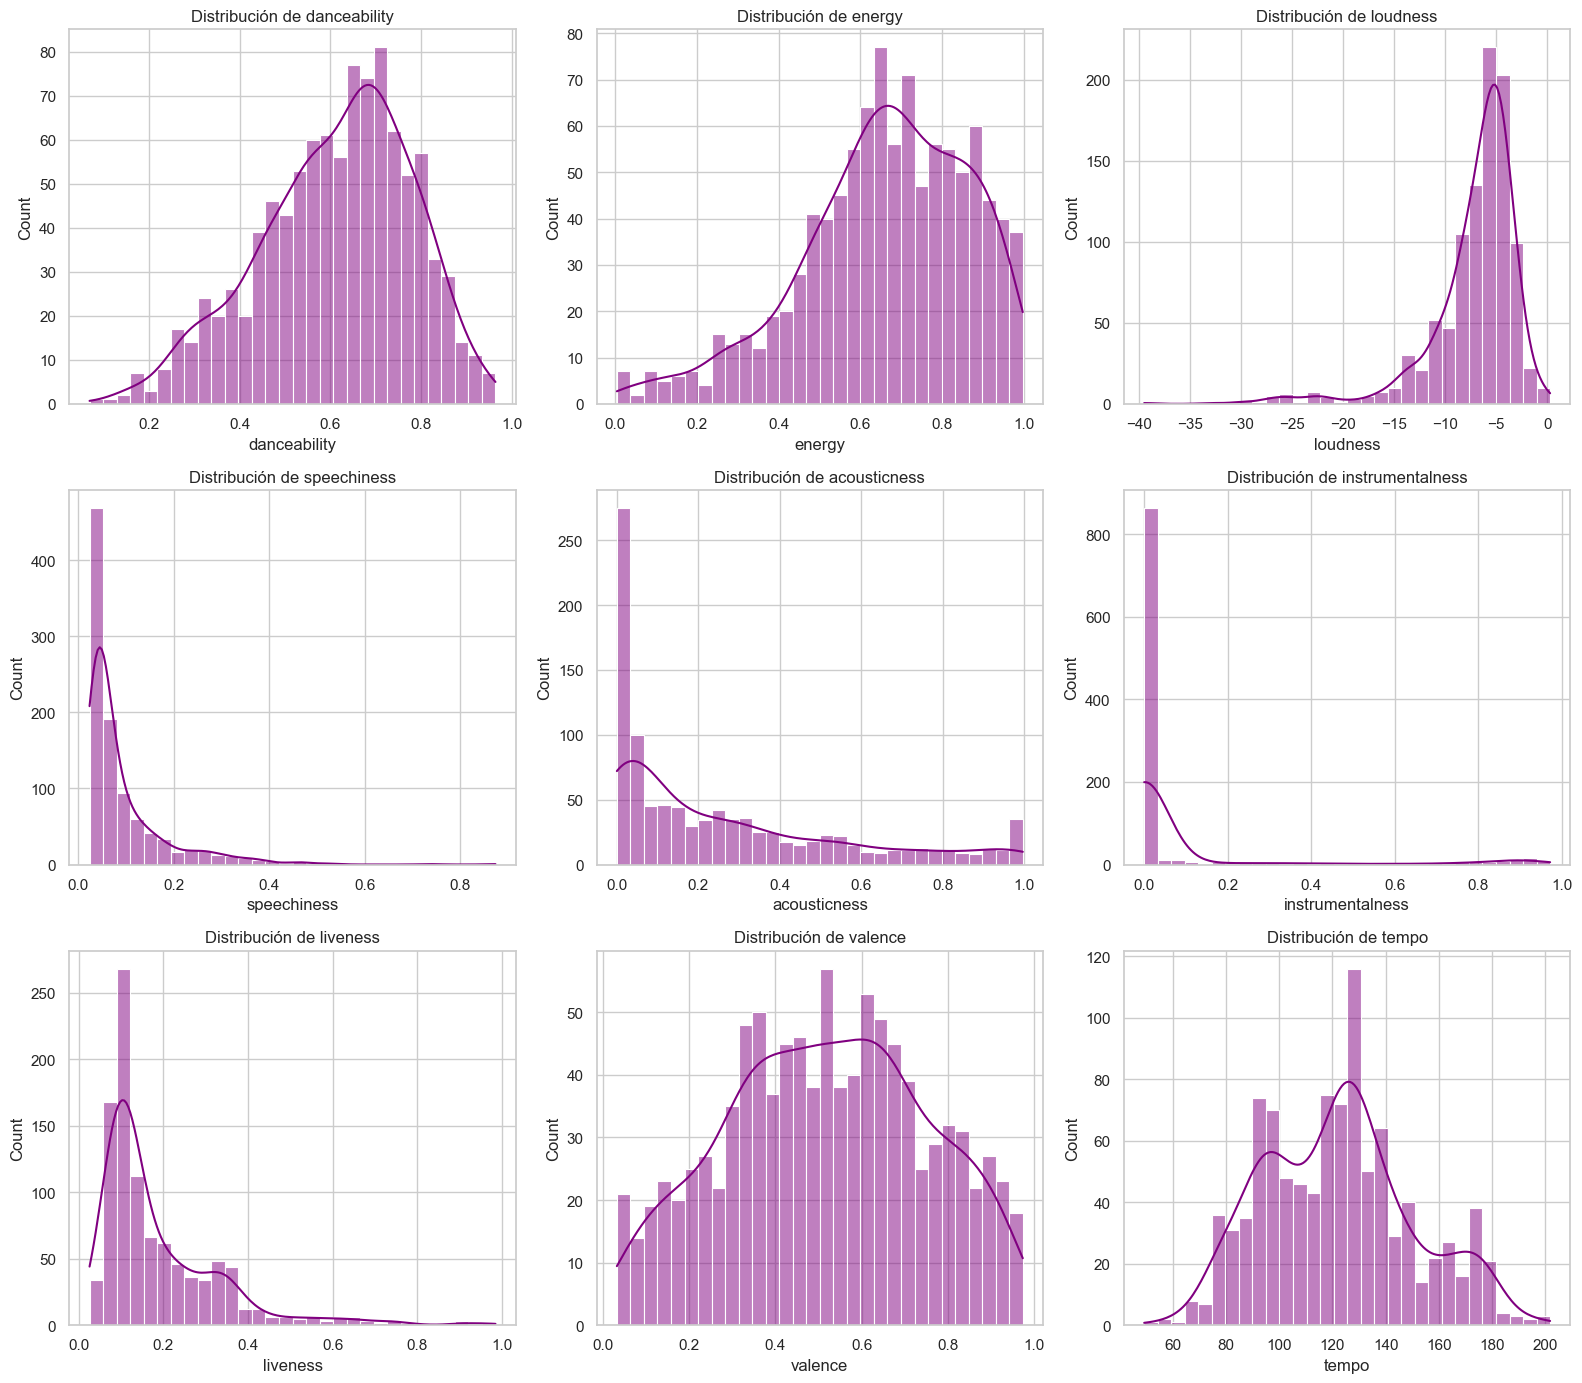

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

plt.figure(figsize=(16, 14))
for i, col in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='purple')
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


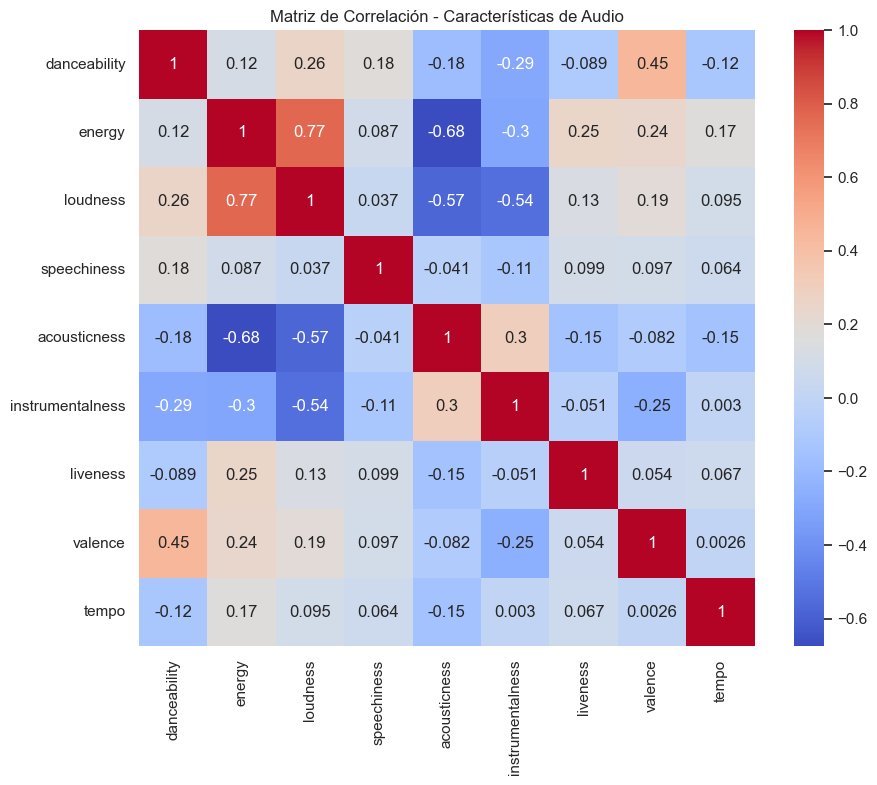

In [15]:
corr_matrix = df[audio_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Matriz de Correlación - Características de Audio")
plt.show()



C:\Users\gutie\AppData\Local\Temp\ipykernel_14236\3458954476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="muted")


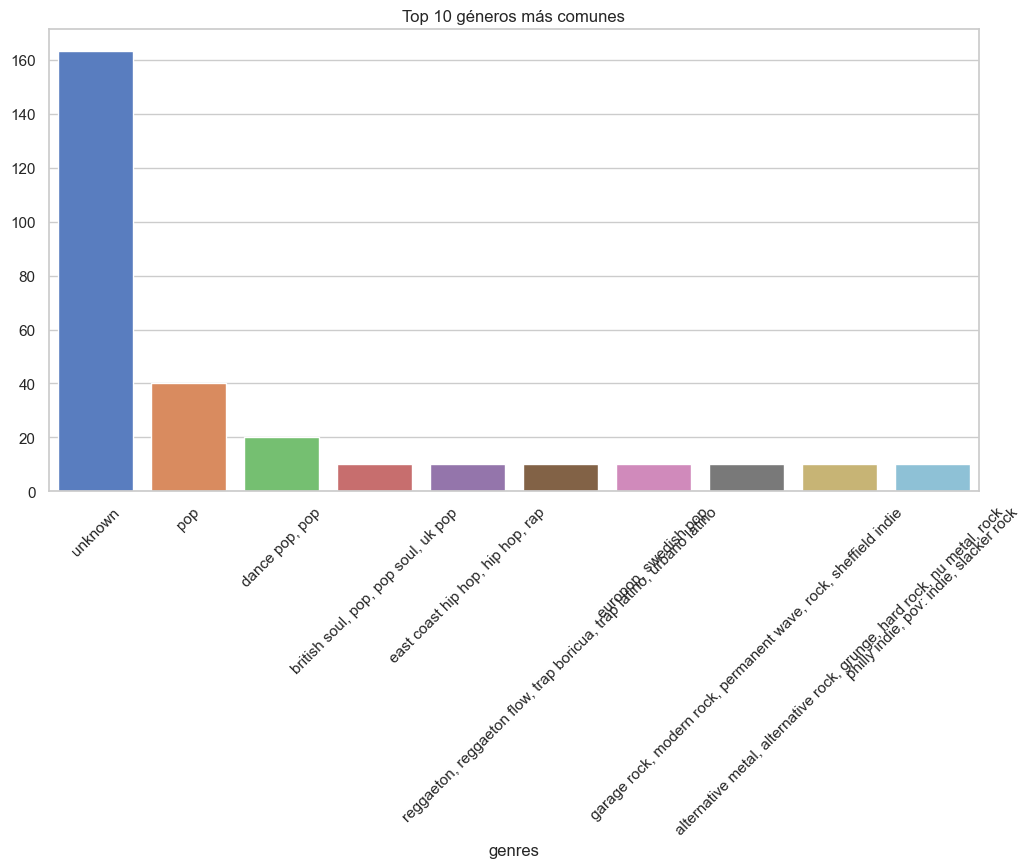

In [16]:
plt.figure(figsize=(12, 6))
# Contar los géneros más frecuentes
top_genres = df['genres'].value_counts().nlargest(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette="muted")
plt.xticks(rotation=45)
plt.title("Top 10 géneros más comunes")
plt.show()


## PREPROCESAMIENTO

In [17]:
print(df.isnull().sum())


Unnamed: 0           0
artist_name          0
genres               0
followers            0
artist_popularity    0
artist_url           0
track_name           0
album_name           0
release_date         0
duration_ms          0
explicit             0
track_popularity     0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
dtype: int64


In [18]:
print(f"Duplicados: {df.duplicated().sum()}")


Duplicados: 0


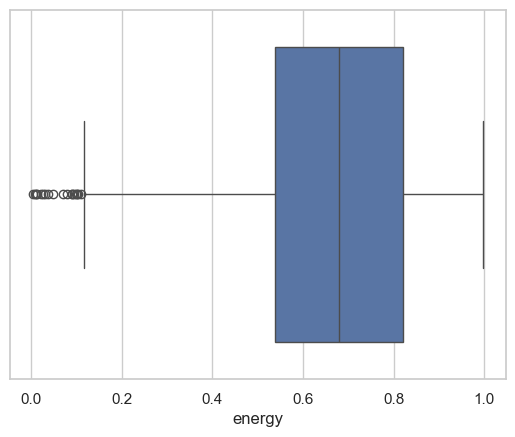

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo para 'energy'
sns.boxplot(x=df['energy'])
plt.show()


In [20]:
df['explicit'] = df['explicit'].astype(int)


### ESCALADO

In [22]:
from sklearn.preprocessing import StandardScaler

# Primero definimos las columnas que vamos a escalar
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'explicit'
]

# Convertimos explícito a numérico (0/1) si no lo has hecho aún
df['explicit'] = df['explicit'].astype(int)

# Extraemos solo esas columnas
X = df[features]

# Creamos el scaler y ajustamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Si quieres, puedes crear un DataFrame con las columnas ya escaladas para manejar mejor
import pandas as pd
df_scaled = pd.DataFrame(X_scaled, columns=features)

# Opcional: juntar con las columnas no numéricas que quieras conservar
df_prepared = pd.concat([df[['artist_name', 'track_name', 'genres']], df_scaled], axis=1)


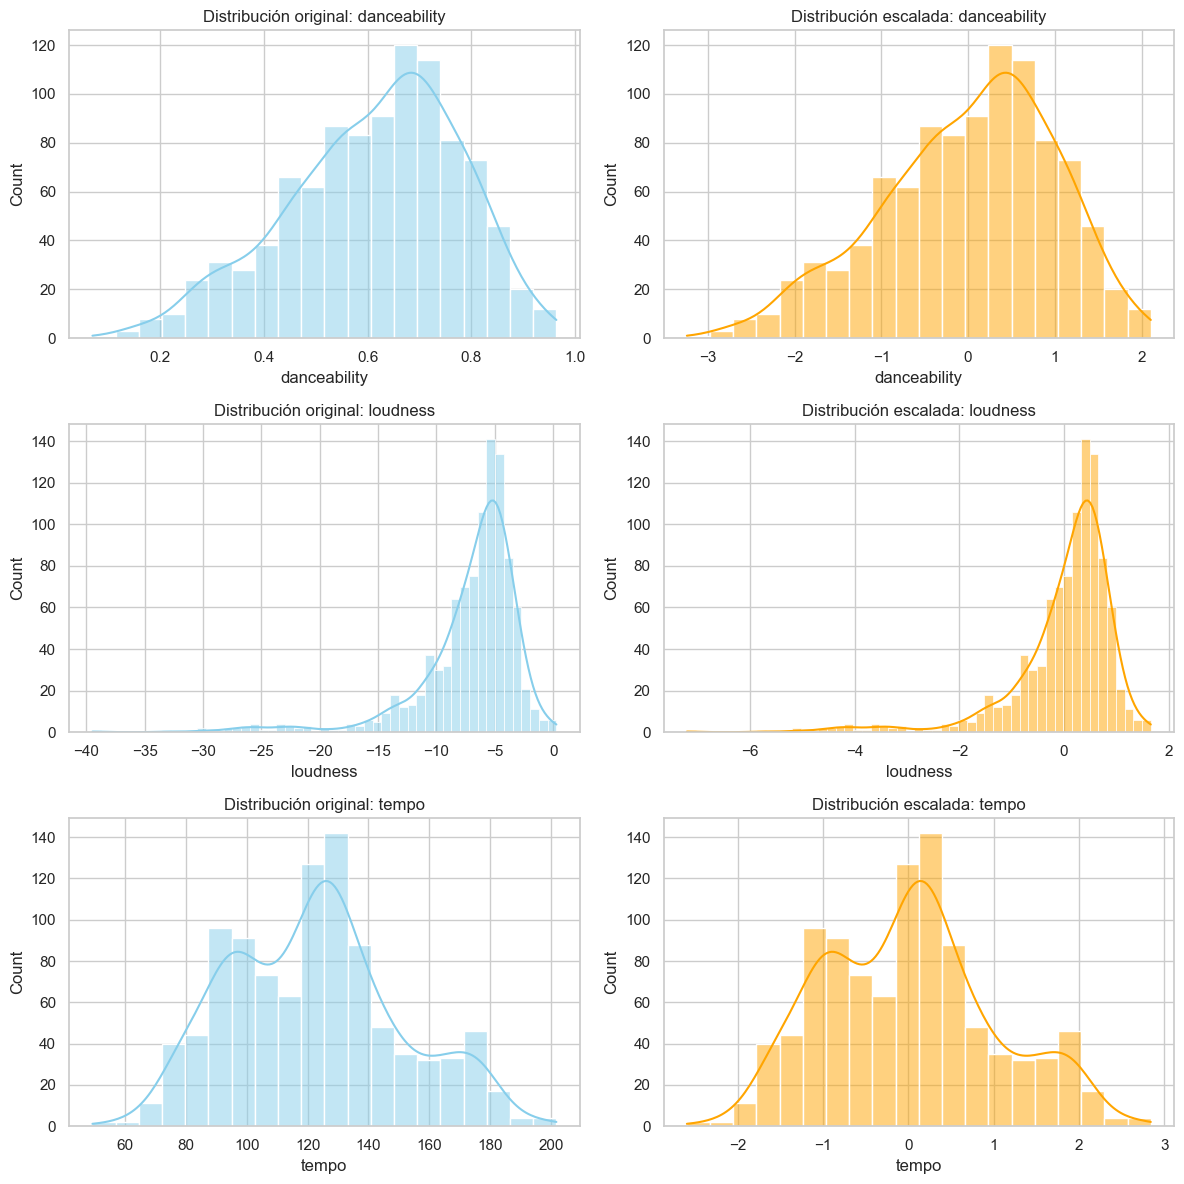

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas que quieres visualizar
cols_to_plot = ['danceability', 'loudness', 'tempo']

# Graficar antes y después del escalado
fig, axes = plt.subplots(len(cols_to_plot), 2, figsize=(12, 4 * len(cols_to_plot)))

for i, col in enumerate(cols_to_plot):
    # Antes del escalado
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribución original: {col}')
    
    # Después del escalado
    sns.histplot(df_scaled[col], kde=True, ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'Distribución escalada: {col}')

plt.tight_layout()
plt.show()


In [24]:
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'explicit'
]


In [25]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Convertir explícito a int si no está hecho
df['explicit'] = df['explicit'].astype(int)

# Extraemos las características
X = df[features]

# Escalamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un dataframe con las columnas escaladas
df_scaled = pd.DataFrame(X_scaled, columns=features)

# Juntar con columnas que quieras conservar (como artista, track, géneros)
df_prepared = pd.concat([df[['artist_name', 'track_name', 'genres']], df_scaled], axis=1)


### DIVISION Y SEPARACION

In [26]:
from sklearn.model_selection import train_test_split

# Tomamos solo las columnas escaladas para el modelo
X_final = df_prepared[features].values  # numpy array de solo features escaladas

# División
X_train, X_test = train_test_split(X_final, test_size=0.2, random_state=42)

print(f'Tamaño train: {X_train.shape}, tamaño test: {X_test.shape}')


Tamaño train: (800, 10), tamaño test: (200, 10)


## MODELADO

In [28]:
from sklearn.neighbors import NearestNeighbors

# Instanciamos el modelo KNN (puedes cambiar n_neighbors para probar)
knn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')

# Entrenamos con los datos de entrenamiento (características escaladas)
knn_model.fit(X_train)


ValueError: Input X contains NaN.
NearestNeighbors does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Tomamos X_final con todas las canciones (o una muestra si es muy grande)
X_sample = X_final[:5000]  # toma 5000 para hacerlo más rápido, ajusta según tu PC

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_sample)

# Graficar
plt.figure(figsize=(10,7))
plt.scatter(X_embedded[:,0], X_embedded[:,1], s=5, alpha=0.6)
plt.title('Visualización 2D de canciones con t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


ValueError: Input X contains NaN.
TSNE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# DESCRIPCIÓN

# EXPLORATORIO

In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("SMUSIC.csv")  # ajusta el nombre según tu archivo


In [2]:
# Primeras filas
print(df.head())

# Dimensiones
print(df.shape)

# Tipos de datos
print(df.dtypes)

# Nulos por columna
print(df.isnull().sum())

# Descripción estadística de las columnas numéricas
print(df.describe())


   Unnamed: 0    artist_name genres  followers  artist_popularity  \
0           0  Ariana Grande    pop   98934105                 89   
1           1  Ariana Grande    pop   98934105                 85   
2           2  Ariana Grande    pop   98934105                 83   
3           3  Ariana Grande    pop   98934105                 80   
4           4  Ariana Grande    pop   98934105                 79   

                                          artist_url  \
0  https://open.spotify.com/artist/66CXWjxzNUsdJx...   
1  https://open.spotify.com/artist/66CXWjxzNUsdJx...   
2  https://open.spotify.com/artist/66CXWjxzNUsdJx...   
3  https://open.spotify.com/artist/66CXWjxzNUsdJx...   
4  https://open.spotify.com/artist/66CXWjxzNUsdJx...   

                                          track_name            album_name  \
0           we can't be friends (wait for your love)      eternal sunshine   
1                                    the boy is mine      eternal sunshine   
2             

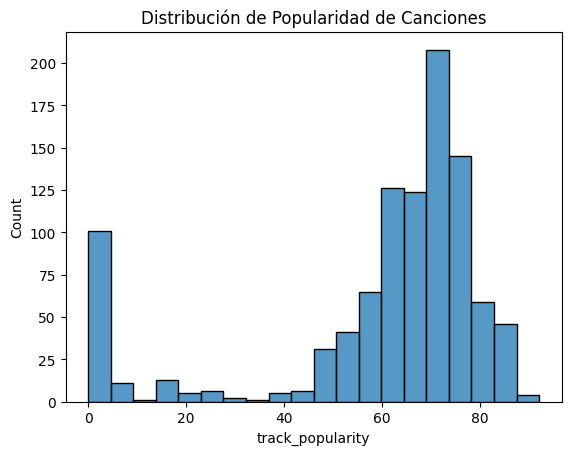

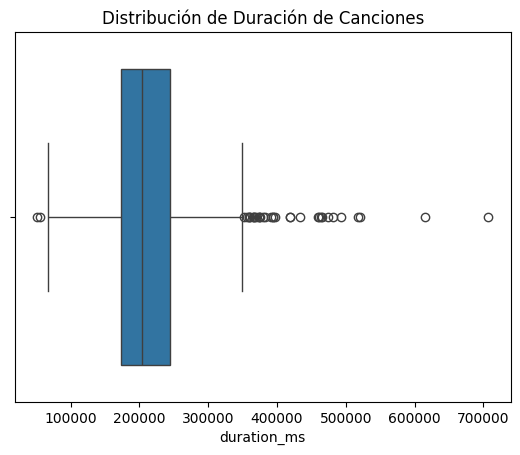

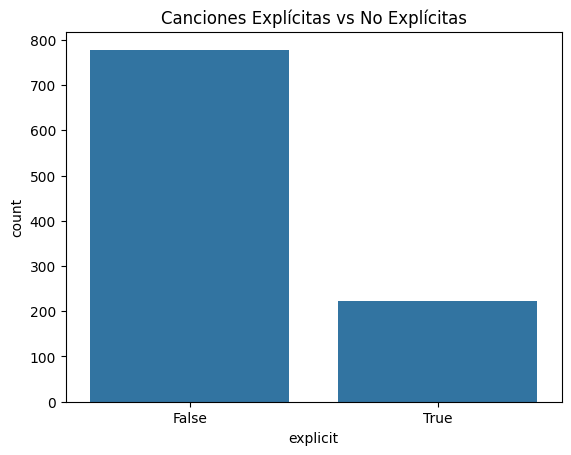

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de popularidad de la canción
sns.histplot(df['track_popularity'], bins=20)
plt.title('Distribución de Popularidad de Canciones')
plt.show()

# Boxplot de duración
sns.boxplot(x=df['duration_ms'])
plt.title('Distribución de Duración de Canciones')
plt.show()

# Conteo de canciones explícitas vs no explícitas
sns.countplot(x='explicit', data=df)
plt.title('Canciones Explícitas vs No Explícitas')
plt.show()


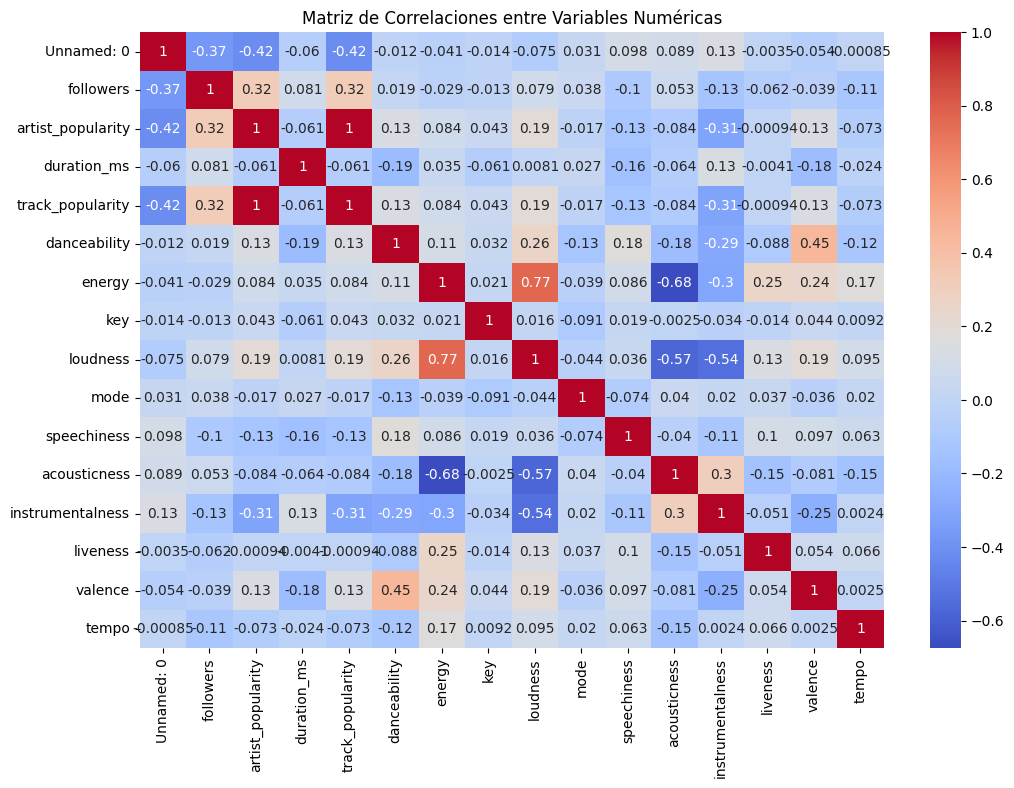

In [4]:
# Mapa de calor de correlaciones
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlaciones entre Variables Numéricas')
plt.show()


# PREPROCESAMIENTO

## LIMPIEZA

In [5]:
df.drop(columns=["Unnamed: 0", "artist_url"], inplace=True)


In [6]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year


In [7]:
df['genres'].fillna('Unknown', inplace=True)


C:\Users\gutie\AppData\Local\Temp\ipykernel_5948\939058493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].fillna('Unknown', inplace=True)


In [8]:
df['duration_min'] = df['duration_ms'] / 60000


In [9]:
# Canciones populares: popularidad >= 70
df['is_popular'] = (df['track_popularity'] >= 70).astype(int)


 Todas las columnas numéricas limpias y normalizadas

 Variables temporales disponibles (release_year)

Categóricas codificadas o listas para codificación

Variable objetivo para clasificación o regresión

## ENCODING

In [10]:
genres_dummies = pd.get_dummies(df['genres'], prefix='genre')
df = pd.concat([df, genres_dummies], axis=1)
df.drop(columns=['genres'], inplace=True)


In [12]:
print(df.filter(like='genre').head())
print(df.shape)


   genre_Unknown  genre_afrobeats  genre_afrobeats, nigerian pop  \
0          False            False                          False   
1          False            False                          False   
2          False            False                          False   
3          False            False                          False   
4          False            False                          False   

   genre_album rock, classic rock, detroit rock, glam metal, glam rock, hard rock, metal, protopunk, rock  \
0                                              False                                                        
1                                              False                                                        
2                                              False                                                        
3                                              False                                                        
4                                             

In [11]:
key_dummies = pd.get_dummies(df['key'], prefix='key')
df = pd.concat([df, key_dummies], axis=1)
df.drop(columns=['key'], inplace=True)


In [13]:
print(df.filter(like='key_').head())


   key_0  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  \
0  False  False  False  False  False   True  False  False  False  False   
1  False  False  False  False  False  False  False   True  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3   True  False  False  False  False  False  False  False  False  False   
4  False   True  False  False  False  False  False  False  False  False   

   key_10  key_11  
0   False   False  
1   False   False  
2    True   False  
3   False   False  
4   False   False  


In [17]:
print(df.isnull().sum().sum())  # Debe dar 0


72


In [15]:
print(df.isnull().sum().sort_values(ascending=False).head(10))


release_date         72
release_year         72
followers             0
artist_popularity     0
track_name            0
album_name            0
duration_ms           0
explicit              0
track_popularity      0
danceability          0
dtype: int64


In [16]:
median_year = int(df['release_year'].median())
df['release_year'].fillna(median_year, inplace=True)


C:\Users\gutie\AppData\Local\Temp\ipykernel_5948\142015391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['release_year'].fillna(median_year, inplace=True)


In [19]:
print(df.columns)


Index(['artist_name', 'followers', 'artist_popularity', 'track_name',
       'album_name', 'release_date', 'duration_ms', 'explicit',
       'track_popularity', 'danceability',
       ...
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'popular'],
      dtype='object', length=116)


In [20]:
# Columnas a eliminar (las textuales y objetivo)
cols_to_drop = ['popular', 'track_popularity', 'artist_name', 'track_name', 'album_name', 'release_date']

# Solo eliminamos las que están presentes (por seguridad)
cols_to_drop = [col for col in cols_to_drop if col in df.columns]

X = df.drop(columns=cols_to_drop)
y = df['popular']

# Confirmar que X solo tiene numéricas:
print(X.dtypes.value_counts())

# Si todo bien, continuar con escalado y modelo


bool       94
float64    11
int64       5
Name: count, dtype: int64


In [30]:
# Guardar el dataset completo
df.to_csv('mi_dataset_musica.csv', index=False)



# LOGISTIC REGRESSION

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Crear variable objetivo binaria
df['popular'] = (df['track_popularity'] >= 70).astype(int)

# Columnas a eliminar (objetivo y columnas textuales)
cols_to_drop = ['popular', 'track_popularity', 'artist_name', 'track_name', 'album_name', 'release_date']
cols_to_drop = [col for col in cols_to_drop if col in df.columns]

X = df.drop(columns=cols_to_drop)
y = df['popular']

# Verificar tipos de datos en X
print("Tipos en X:")
print(X.dtypes.value_counts())

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predecir
y_pred = model.predict(X_test_scaled)

# Evaluar resultados
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Tipos en X:
bool       94
float64    11
int64       5
Name: count, dtype: int64
Matriz de confusión:
[[117   0]
 [  0  83]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        83

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [29]:
# Excluir columnas no numéricas Y la variable con data leakage
cols_to_drop = ['popular', 'track_popularity', 'artist_popularity', 'track_name', 'album_name', 'artist_name', 'release_date', 'is_popular']  # ← Agregar aquí
X = df.drop(columns=cols_to_drop)
y = df['popular']



# Verifica qué columnas quedan (deben ser numéricas)
print(X.dtypes.value_counts())

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test_scaled)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


bool       94
float64    11
int64       3
Name: count, dtype: int64
Matriz de confusión:
[[91 26]
 [34 49]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       117
           1       0.65      0.59      0.62        83

    accuracy                           0.70       200
   macro avg       0.69      0.68      0.69       200
weighted avg       0.70      0.70      0.70       200



Correlación con la variable objetivo 'popular':
is_popular           1.000000
popular              1.000000
track_popularity     0.582869
artist_popularity    0.582869
followers            0.366991
danceability         0.184276
loudness             0.173725
valence              0.109996
energy               0.054445
release_year         0.027069
duration_ms          0.025573
duration_min         0.025573
mode                -0.016695
tempo               -0.033845
acousticness        -0.048076
liveness            -0.067514
speechiness         -0.076062
instrumentalness    -0.219757
Name: popular, dtype: float64


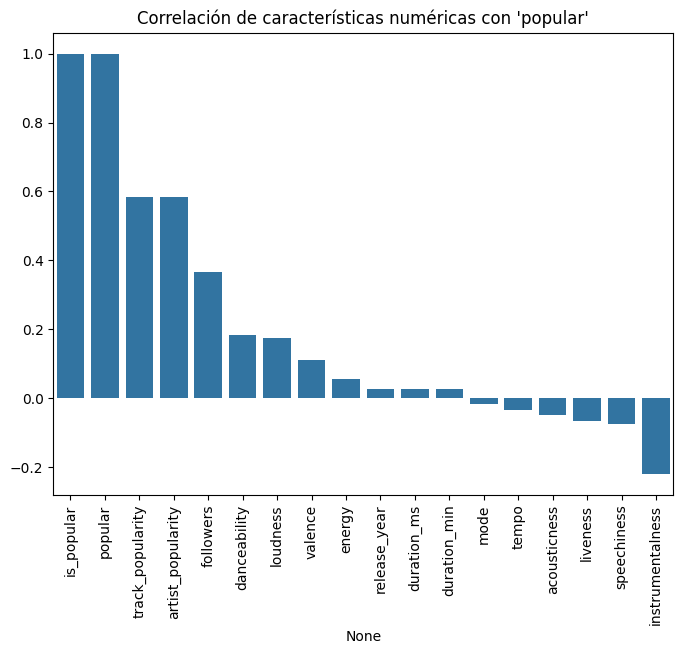

In [26]:
# Selecciona solo las columnas numéricas (incluyendo la variable objetivo)
num_df = df.select_dtypes(include=['int64', 'float64'])

# Ahora calcula la correlación con 'popular'
corr = num_df.corr()['popular'].sort_values(ascending=False)

print("Correlación con la variable objetivo 'popular':")
print(corr)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.title("Correlación de características numéricas con 'popular'")
plt.show()


c:\Users\gutie\IA\GHOST_ORCHYD\ANALISIS DE DATOS\TRY 2\V1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\gutie\IA\GHOST_ORCHYD\ANALISIS DE DATOS\TRY 2\V1\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


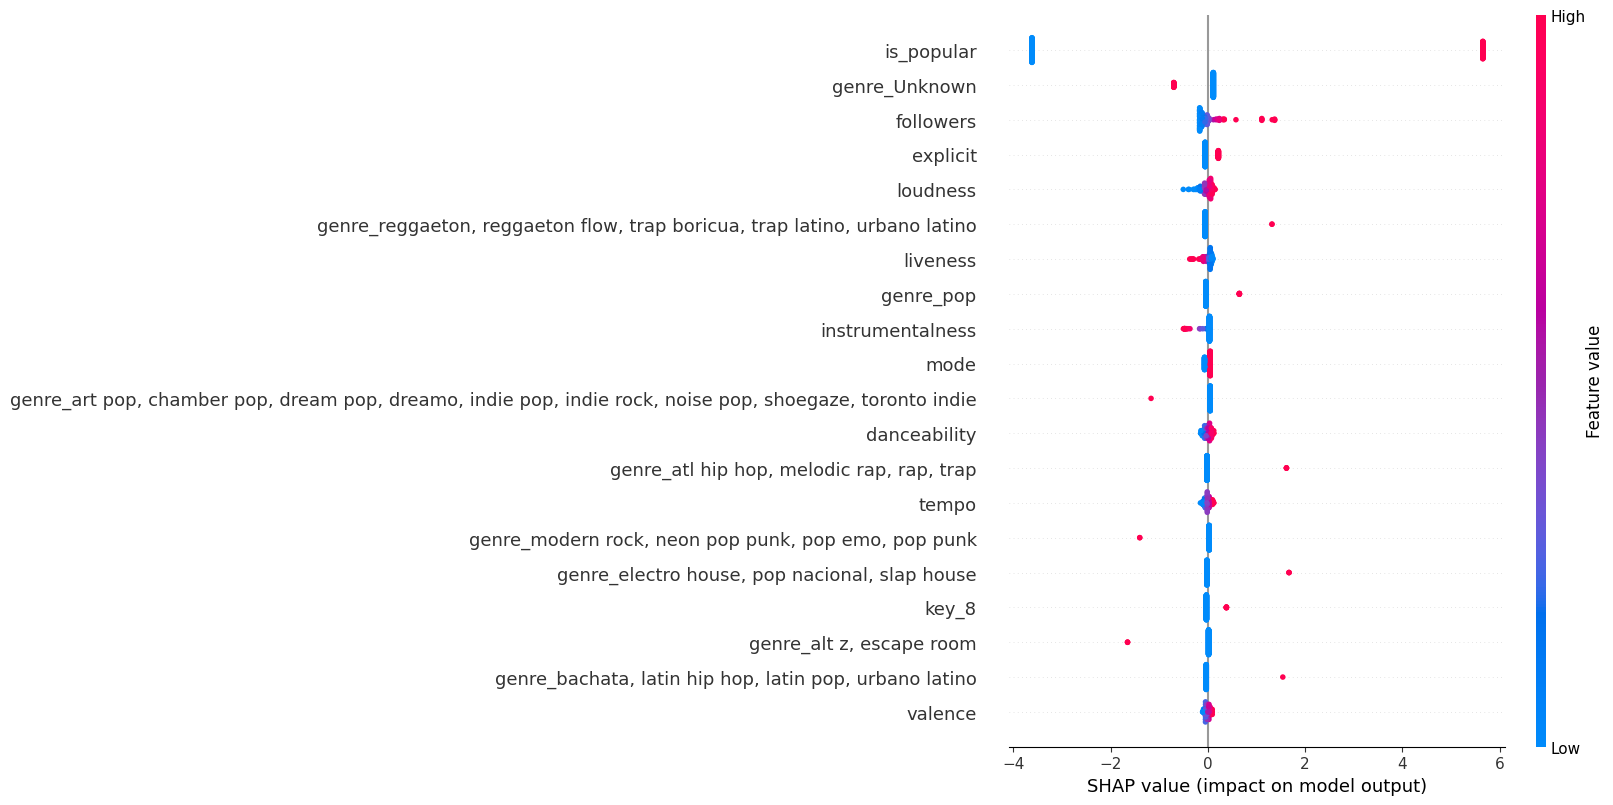

c:\Users\gutie\IA\GHOST_ORCHYD\ANALISIS DE DATOS\TRY 2\V1\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


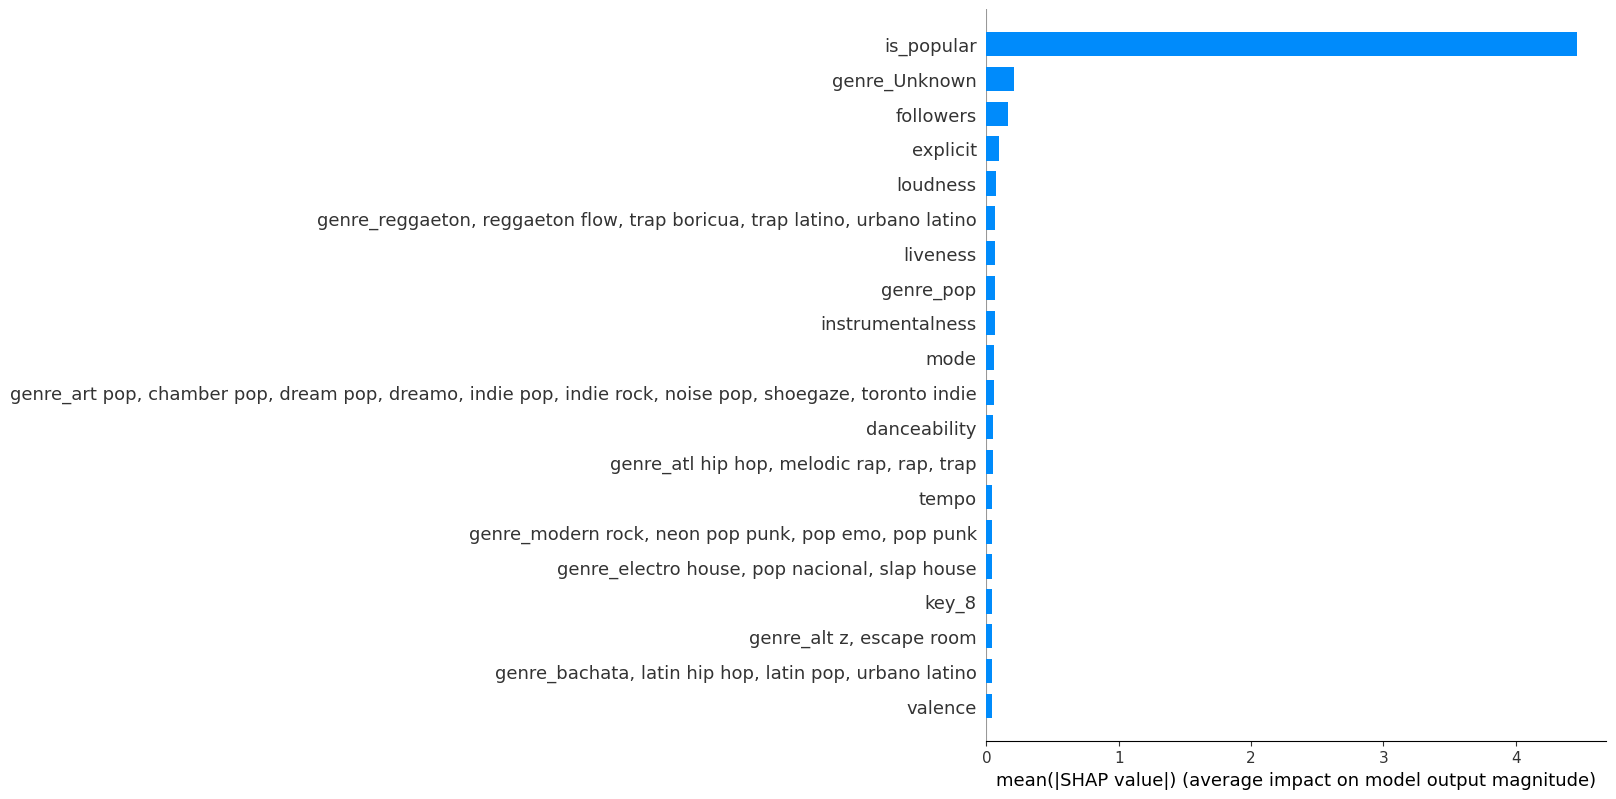

In [28]:
import shap

# Crear explainer con el modelo entrenado y datos escalados (puedes usar X_train_scaled)
explainer = shap.Explainer(model, X_train_scaled)

# Obtener valores SHAP para el conjunto de prueba
shap_values = explainer(X_test_scaled)

# Visualizar importancia global de las features
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)

# También puedes hacer un summary plot con tipo "bar"
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, plot_type="bar")


=== ANÁLISIS DE LA VARIABLE 'popular' ===
Tipo de datos: int64
Valores únicos: [1 0]
Distribución:
popular
0    584
1    416
Name: count, dtype: int64
Porcentaje de canciones populares: 41.6%

=== COMPARACIÓN CON TRACK_POPULARITY ===
Track popularity range: 0 - 92
Promedio track_popularity cuando popular=1: 75.9
Promedio track_popularity cuando popular=0: 47.7


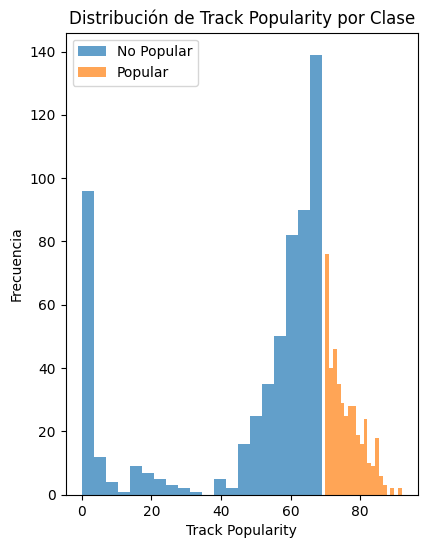

In [31]:
# Ver información básica de la variable popular
print("=== ANÁLISIS DE LA VARIABLE 'popular' ===")
print(f"Tipo de datos: {df['popular'].dtype}")
print(f"Valores únicos: {df['popular'].unique()}")
print(f"Distribución:")
print(df['popular'].value_counts())
print(f"Porcentaje de canciones populares: {df['popular'].mean()*100:.1f}%")

# Si tienes las variables de popularidad originales, compáralas
if 'track_popularity' in df.columns:
    print(f"\n=== COMPARACIÓN CON TRACK_POPULARITY ===")
    print(f"Track popularity range: {df['track_popularity'].min()} - {df['track_popularity'].max()}")
    print(f"Promedio track_popularity cuando popular=1: {df[df['popular']==1]['track_popularity'].mean():.1f}")
    print(f"Promedio track_popularity cuando popular=0: {df[df['popular']==0]['track_popularity'].mean():.1f}")

# Ver si hay algún umbral claro
if 'track_popularity' in df.columns:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.hist(df[df['popular']==0]['track_popularity'], alpha=0.7, label='No Popular', bins=20)
    plt.hist(df[df['popular']==1]['track_popularity'], alpha=0.7, label='Popular', bins=20)
    plt.xlabel('Track Popularity')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.title('Distribución de Track Popularity por Clase')
    plt.show()

# RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenamos el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = rf_model.predict(X_test_scaled)

# Evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[89 28]
 [32 51]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       117
           1       0.65      0.61      0.63        83

    accuracy                           0.70       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.70      0.70      0.70       200



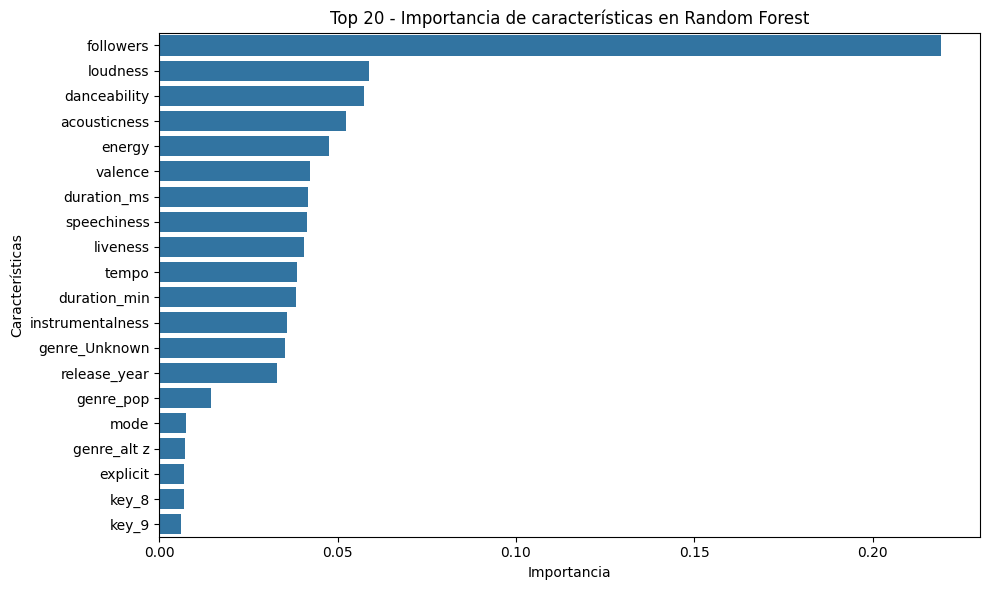

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importancia de variables
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:20], y=features[indices][:20])
plt.title("Top 20 - Importancia de características en Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


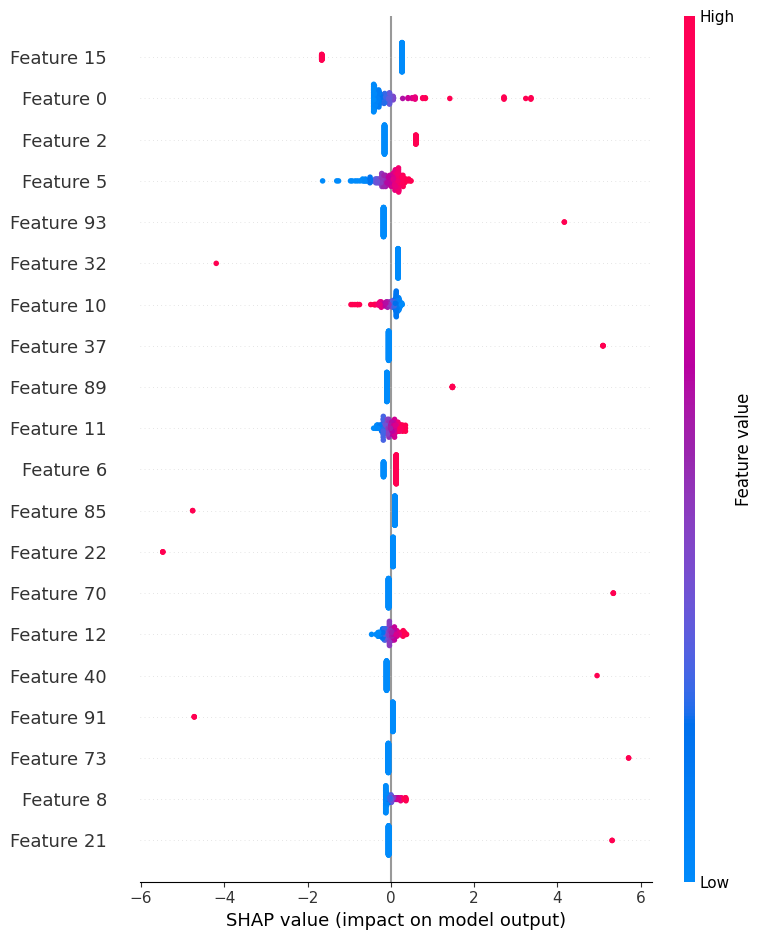

In [36]:
import pandas as pd
import shap

# Paso 1: Reconstruir DataFrame con nombres correctos
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Paso 2: Crear el explainer de SHAP con el modelo
explainer = shap.Explainer(model, X_train_scaled)

# Paso 3: Obtener los valores SHAP
shap_values = explainer(X_test_scaled)

# Paso 4: Gráfico resumen
shap.summary_plot(shap_values, X_test_scaled_df)


<Figure size 640x480 with 0 Axes>

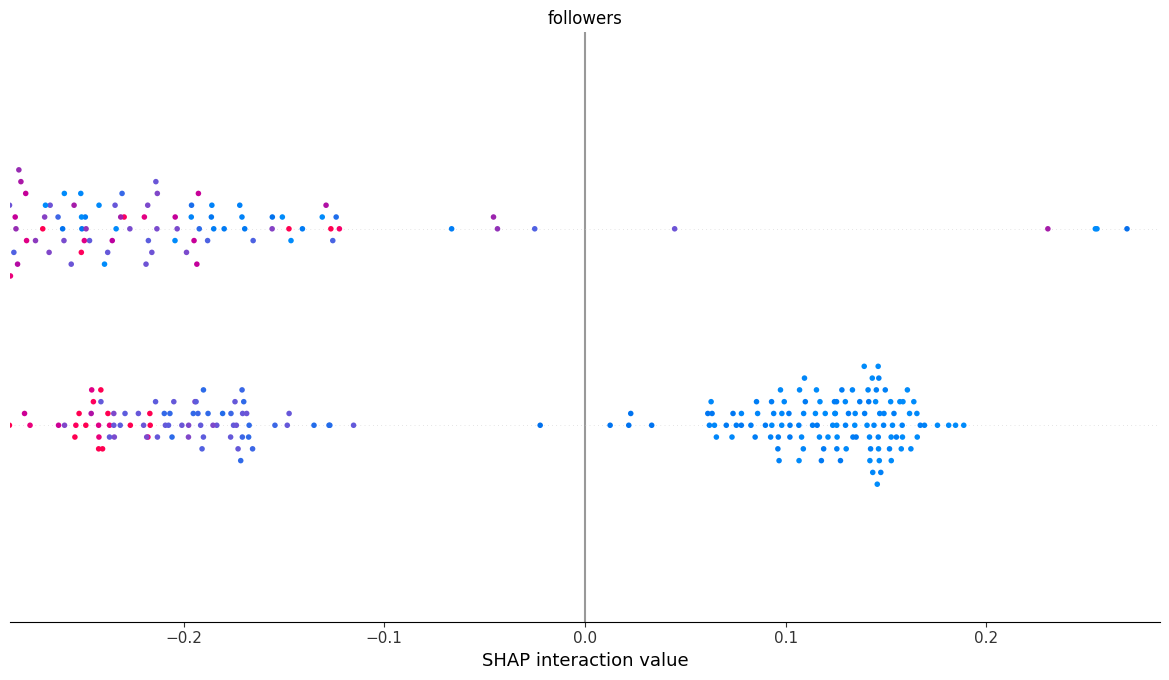

In [42]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Preparar los datos
cols_to_drop = ['popular', 'track_popularity', 'artist_popularity', 'track_name', 
                'album_name', 'artist_name', 'release_date', 'is_popular']

X = df.drop(columns=cols_to_drop)
y = df['popular']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame para SHAP
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# 3. Entrenar modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled_df, y_train)

# 4. SHAP con TreeExplainer (específico para Random Forest)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled_df)

# 5. Gráfico resumen de SHAP para la clase 1 (popular = 1)
shap.summary_plot(shap_values, X_test_scaled_df)




In [39]:
print(type(shap_values))
print(np.array(shap_values).shape)


<class 'shap._explanation.Explanation'>
(200, 108)


# Gradient Boosting Classifier 

Matriz de confusión:
[[91 26]
 [32 51]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       117
           1       0.66      0.61      0.64        83

    accuracy                           0.71       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.71      0.71      0.71       200



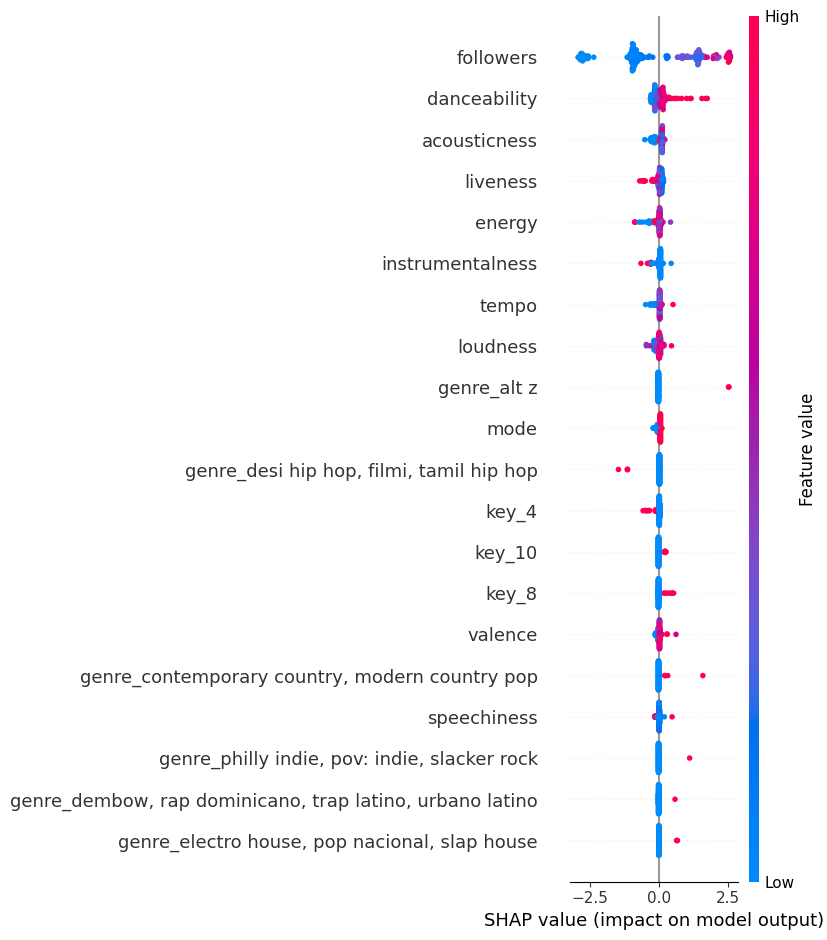

In [38]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt

# 1. Preparar datos (igual que antes)
cols_to_drop = ['popular', 'track_popularity', 'artist_popularity', 'track_name', 
                'album_name', 'artist_name', 'release_date', 'is_popular']

X = df.drop(columns=cols_to_drop)
y = df['popular']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame para SHAP
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# 3. Modelo: Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled_df, y_train)

# 4. Evaluación
y_pred = model.predict(X_test_scaled_df)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# 5. SHAP (usar Explainer genérico para modelos no lineales)
explainer = shap.Explainer(model, X_train_scaled_df)
shap_values = explainer(X_test_scaled_df)

# 6. Visualización SHAP
shap.summary_plot(shap_values, X_test_scaled_df)


# VOTING CLASSIFIER

In [43]:
from sklearn.ensemble import VotingClassifier
# Instancias sin entrenar
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_lr = LogisticRegression(max_iter=1000)
model_gb = GradientBoostingClassifier(random_state=42)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', model_rf),
        ('lr', model_lr),
        ('gb', model_gb)
    ],
    voting='hard'  # Usa 'soft' si quieres promediar probabilidades
)
# Entrenamiento
voting_clf.fit(X_train_scaled, y_train)

# Predicción
y_pred = voting_clf.predict(X_test_scaled)

# Evaluación
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[90 27]
 [33 50]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       117
           1       0.65      0.60      0.62        83

    accuracy                           0.70       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.70      0.70      0.70       200

